In [13]:
import pandas as pd
from matplotlib import pyplot
import ta
from ta.utils import dropna
from ta import add_all_ta_features
from ta.volatility import BollingerBands
import seaborn as sns

df = pd.read_csv("bitcoin_30sec_0422-0425.csv",index_col=3, parse_dates=True)

df.head()

,trade_id,price,size,bid,ask,volume,std_dev
time,,,,,,,
2021-04-22 07:51:48.290180+00:00,159240634,54171.44,0.000102,54171.44,54171.45,20349.04740,NaN
2021-04-22 07:52:19.901349+00:00,159240773,54129.78,0.002898,54121.03,54129.87,20349.04740,NaN
2021-04-22 07:52:48.637295+00:00,159240860,54144.10,0.009590,54144.10,54144.11,20354.91451,NaN
2021-04-22 07:53:16.236350+00:00,159240963,54198.09,0.006843,54201.08,54201.09,20354.91451,NaN
2021-04-22 07:53:48.869784+00:00,159241036,54222.74,0.001185,54207.86,54207.87,20360.05830,34.084962


In [14]:
# Clean NaN values
df = dropna(df)

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=df["price"], window=50, window_dev=1.5)

# Add Bollinger Bands features
#df['bb_bbm'] = indicator_bb.bollinger_mavg()
df['bb_bbh'] = indicator_bb.bollinger_hband()
df['bb_bbl'] = indicator_bb.bollinger_lband()

# Add Bollinger Band high indicator
df['bb_bbhi'] = indicator_bb.bollinger_hband_indicator()

# Add Bollinger Band low indicator
df['bb_bbli'] = indicator_bb.bollinger_lband_indicator()

df[['price','bb_bbh','bb_bbl','bb_bbhi','bb_bbli']].head(100)


,price,bb_bbh,bb_bbl,bb_bbhi,bb_bbli
time,,,,,
2021-04-22 07:53:48.869784+00:00,54222.74,NaN,NaN,0.0,0.0
2021-04-22 07:54:19.013839+00:00,54227.32,NaN,NaN,0.0,0.0
2021-04-22 07:54:48.227633+00:00,54200.02,NaN,NaN,0.0,0.0
2021-04-22 07:55:20.177218+00:00,54238.70,NaN,NaN,0.0,0.0
2021-04-22 07:55:49.985144+00:00,54248.17,NaN,NaN,0.0,0.0
...,...,...,...,...,...
2021-04-22 08:41:21.555373+00:00,53627.92,53818.014508,53587.126692,0.0,0.0
2021-04-22 08:41:51.932517+00:00,53584.52,53817.925118,53581.889682,0.0,0.0
2021-04-22 08:42:18.686407+00:00,53536.60,53819.464265,53573.678135,0.0,1.0


<AxesSubplot:xlabel='time'>

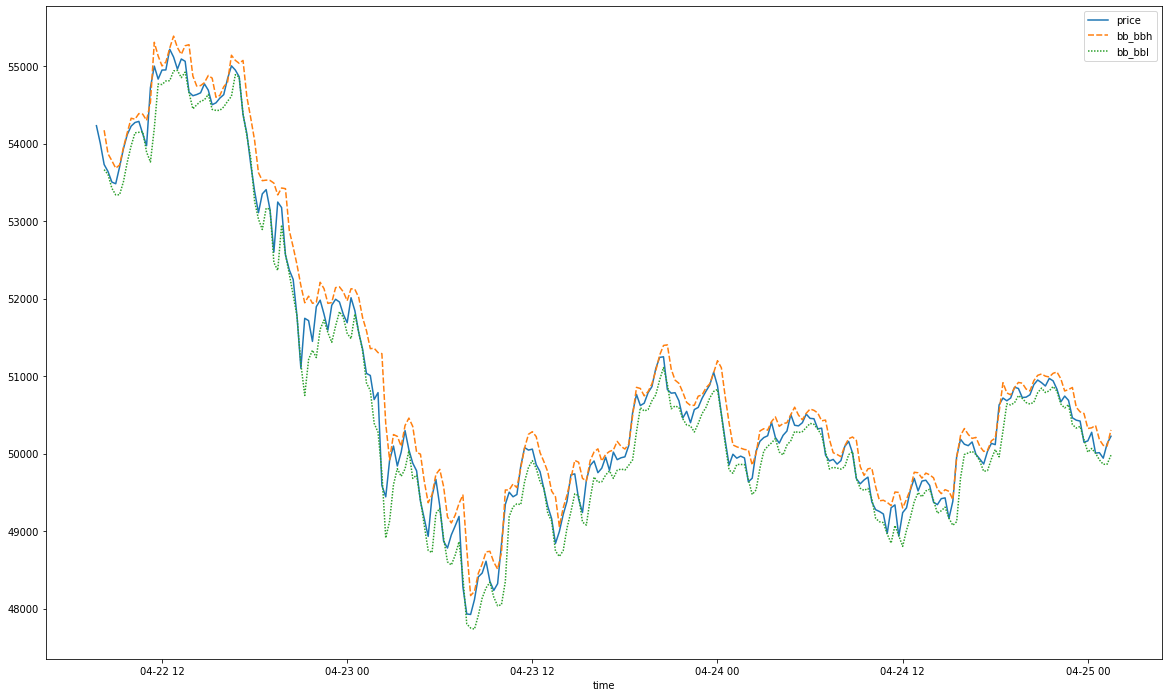

In [26]:
a4_dims = (20, 12)
fig, ax = pyplot.subplots(figsize=a4_dims)

#sns.lineplot(ax=ax, data=df[['price','bb_bbm','bb_bbh','bb_bbl']])
gp = df.resample('15min').agg({'price':'mean',  'bb_bbh':'mean',  'bb_bbl':'mean' })
sns.lineplot(ax=ax, data=gp[['price','bb_bbh','bb_bbl']])

In [30]:

dfa = df.resample('1min').agg({'price':'mean', 'volume':'sum'})
#dfr['sma5'] = dfr['price'].rolling(5)
dfa['slope_I'] = dfr['price'].rolling(5).apply(lambda x: (x[-1]-x[0])/3)
dfa.head(50)

,price,volume,slope_I
time,,,
2021-04-22 07:53:00+00:00,54222.740,20360.05830,NaN
2021-04-22 07:54:00+00:00,54213.670,40725.61564,NaN
2021-04-22 07:55:00+00:00,54243.435,40732.94222,NaN
2021-04-22 07:56:00+00:00,54240.200,40742.79410,NaN
2021-04-22 07:57:00+00:00,54241.895,40749.25750,6.385000
2021-04-22 07:58:00+00:00,54252.370,40754.75632,12.900000
2021-04-22 07:59:00+00:00,54207.870,40764.08944,-11.855000
2021-04-22 08:00:00+00:00,54235.275,40769.53342,-1.641667
2021-04-22 08:01:00+00:00,54227.930,39960.37225,-4.655000
